<a href="https://colab.research.google.com/github/ganeshreddy101/Data-Science-assignments-and-excercise-/blob/main/Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [ ]:
data.shape

(12294, 7)

In [ ]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [ ]:
data.describe(include='all')

,anime_id,name,genre,type,episodes,rating,members
count,12294.000000,12294,12232,12269,12294,12064.000000,1.229400e+04
unique,NaN,12292,3264,6,187,NaN,NaN
top,NaN,Shi Wan Ge Leng Xiaohua,Hentai,TV,1,NaN,NaN
freq,NaN,2,823,3787,5677,NaN,NaN
mean,14058.221653,NaN,NaN,NaN,NaN,6.473902,1.807134e+04
std,11455.294701,NaN,NaN,NaN,NaN,1.026746,5.482068e+04
min,1.000000,NaN,NaN,NaN,NaN,1.670000,5.000000e+00
25%,3484.250000,NaN,NaN,NaN,NaN,5.880000,2.250000e+02
50%,10260.500000,NaN,NaN,NaN,NaN,6.570000,1.550000e+03
75%,24794.500000,NaN,NaN,NaN,NaN,7.180000,9.437000e+03


<Axes: >

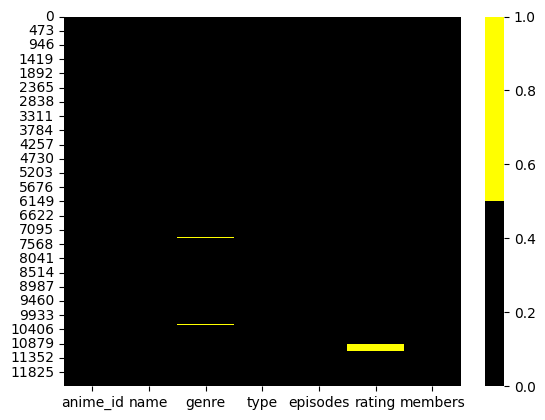

In [ ]:
cols = data.columns
colours = ['black','yellow']
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours), cbar = True)

In [ ]:
data.isnull().any(axis=1)

,0
0,False
1,False
2,False
3,False
4,False
...,...
12289,False
12290,False
12291,False
12292,False


In [ ]:
data[data.isnull().any(axis=1)]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,Unknown,NaN,392
12279,34491,Sagurare Otome The Animation,Hentai,OVA,1,NaN,79
12280,34312,Saimin Class,Hentai,OVA,Unknown,NaN,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,Unknown,NaN,195


In [ ]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [ ]:
data['genre'].value_counts()

,count
genre,
Hentai,885
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [ ]:
data['genre'].mode()[0]

'Hentai'

In [ ]:
data['genre'] = data['genre'].fillna(data['genre'].mode()[0])

In [ ]:
data['genre'].isnull().sum()

0

In [ ]:
data['type'].value_counts()
data['type'].mode()[0]
data['type'] = data['type'].fillna(data['type'].mode()[0])
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
data['type'].isnull().sum()

0

In [ ]:
median = data['rating'].median()
print(median)

6.57


In [ ]:
data['rating'] = data['rating'].fillna(median)
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [ ]:
data.isnull().sum()

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# select features for recommendation
features = ['genre', 'type', 'episodes', 'rating', 'members']

In [ ]:
one_hot_genre = data['genre'].str.get_dummies(sep=',')
one_hot_type = pd.get_dummies(data['type'] , prefix='type')

In [ ]:
#Combine one-hot encodedfeatures with the original dataset
data = pd.concat([data ,one_hot_genre ,one_hot_type] , axis=1)
data

,anime_id,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,1,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,0,0,1,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,0,0,0,...,0,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,0,0,1,...,0,0,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12290,5543,Under World,Hentai,OVA,1,4.28,183,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,0,0,0,...,0,0,0,0,False,False,False,True,False,False
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,0,0,0,...,0,0,0,0,False,False,False,True,False,False


In [ ]:
data.shape

(12294, 183)

In [ ]:
data.drop(['genre','type'], axis=1, inplace=True)

In [ ]:
data.isnull().sum()

,0
anime_id,0
name,0
episodes,0
rating,0
members,0
...,...
type_Music,0
type_ONA,0
type_OVA,0
type_Special,0


In [ ]:
data.head()

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,1,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
2,28977,Gintama°,51,9.25,114262,0,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
4,9969,Gintama&#039;,51,9.16,151266,0,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
data.sort_values('anime_id')

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
22,1,Cowboy Bebop,26,8.82,486824,1,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True
152,5,Cowboy Bebop: Tengoku no Tobira,1,8.40,137636,0,0,0,0,0,...,0,0,0,0,True,False,False,False,False,False
214,6,Trigun,26,8.32,283069,0,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True
2095,7,Witch Hunter Robin,26,7.36,64905,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
3159,8,Beet the Vandel Buster,52,7.06,9848,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,34514,Pokemon Generations,18,7.21,295,1,0,0,0,0,...,0,0,0,0,False,False,True,False,False,False
9586,34519,Mobile Suit Gakuen: G-Reco Koushien,9,5.67,94,0,0,0,0,0,...,0,0,0,0,False,False,False,False,True,False
11104,34522,"Wake Up, Girls! Shin Shou",Unknown,6.57,381,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True
10952,34525,Centaur no Nayami,Unknown,6.57,108,0,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
#number of unique users in the dataset
len(data.anime_id.unique())

12294

In [ ]:
data1 = data.pivot(index='anime_id',columns='name', values='rating')

In [ ]:
data1

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Impute those NaNs with 0 values
data1.fillna(0, inplace=True)
data1

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,ēlDLIVE,◯
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34514,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34519,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Calculating Cosine Similarity between Users
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
user_sim = 1-pairwise_distances(data1.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
user_sim.shape

(12294, 12294)

In [ ]:
np.fill_diagonal(user_sim, 0)
user_sim[0:15, 0:15]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [ ]:
#Store the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)
user_sim_df.iloc[0:20,0:20]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_sim_df.shape

(12294, 12294)

In [ ]:
user_sim_df.loc[10,4047]

0.0

In [ ]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:50]

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
user_sim_df.index

RangeIndex(start=0, stop=12294, step=1)

In [ ]:
user_sim_df.loc[6,168]

0.0

In [ ]:
data[(data['anime_id']==6) | (data['anime_id']==168)]

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
214,6,Trigun,26,8.32,283069,0,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True
1761,168,s.CRY.ed,26,7.45,52784,1,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
user_1=data[data['anime_id']==6]
user_1

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
214,6,Trigun,26,8.32,283069,0,0,1,0,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
user_2=data[data['anime_id']==168]
user_2

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
1761,168,s.CRY.ed,26,7.45,52784,1,0,0,0,0,...,0,0,0,0,False,False,False,False,False,True


In [ ]:
type(user_2)
import warnings
warnings.filterwarnings('ignore')

pandas.core.frame.DataFrame

In [ ]:
 user_2.name

,name
1761,s.CRY.ed


In [ ]:
user_1.name

,name
214,Trigun


In [ ]:
anime_watched_by_user1 = list(set(user_1.name))
anime_watched_by_user2 = list(set(user_2.name))
print(anime_watched_by_user1)
print(anime_watched_by_user2)

['Trigun']
['s.CRY.ed']


In [ ]:
anime_watched_by_user1 = list(set(user_1.name))
anime_watched_by_user2 = list(set(user_2.name))

for anime_name in anime_watched_by_user1:
  if anime_name not in anime_watched_by_user2:
    print("Recommendation : ", anime_name)

Recommendation :  Trigun


In [ ]:
for x in user_sim_df.index:
    sim_user = user_sim_df.idxmax(axis=1)[x]
    print (x,sim_user)
    user_1=data[data['anime_id']== x]
    user_2=data[data['anime_id']== sim_user]
    anime_watched_by_user1 = list(set(user_1.name))
    anime_watched_by_user2 = list(set(user_2.name))

    for anime_name in anime_watched_by_user1:
        if anime_name not in anime_watched_by_user2:
            print("Recommendation for userid:",sim_user , anime_name)
    for anime_name in anime_watched_by_user2:
        if anime_name not in anime_watched_by_user1:
            print("Recommendation for userid:", x, anime_name)

Streaming output truncated to the last 5000 lines.
8591 0
8592 0
8593 0
8594 0
8595 0
Recommendation for userid: 0 Kotencotenco
8596 0
8597 0
8598 0
Recommendation for userid: 0 Yuki
8599 0
Recommendation for userid: 0 Mayoi Neko Overrun! Specials
8600 0
8601 0
8602 0
8603 0
Recommendation for userid: 0 Tegami: Haikei Juugo no Kimi e
8604 0
Recommendation for userid: 0 Oshiri Kajiri Mushi
8605 0
8606 0
8607 0
8608 0
8609 0
Recommendation for userid: 0 Detective Conan OVA 10: Kid in Trap Island
8610 0
8611 0
8612 0
8613 0
8614 0
8615 0
8616 0
8617 0
8618 0
8619 0
Recommendation for userid: 0 Ladies versus Butlers! Tokuten Disc Music Clip
8620 0
8621 0
8622 0
8623 0
8624 0
Recommendation for userid: 0 Digimon Xros Wars
8625 0
8626 0
Recommendation for userid: 0 Good Morning
8627 0
8628 0
Recommendation for userid: 0 Chains &amp; Rings
8629 0
8630 0
Recommendation for userid: 0 Hidan no Aria
8631 0
Recommendation for userid: 0 YanYan Machiko
8632 0
Recommendation for userid: 0 Chuuzumou
8